# Exercício de Regressão Linear
- Aluno: Pedro Nascimento
- Professor: Cláudio Miceli

## Importando módulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Carregando Dados

In [ ]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Entendendo as variáveis

Observando as correlações. Quanto maior o módulo da correlação, mais as variáveis são relacionáveis.

In [ ]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Melhores correlações entre:
- Sepal Length e Petal Length (0.87)

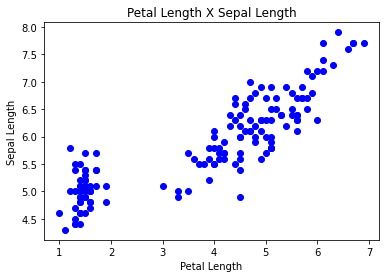

In [ ]:
%matplotlib inline

petal_length = df[ ["petal length (cm)"] ].to_numpy()
sepal_length = df[ ["sepal length (cm)"] ].to_numpy()

plt.title('Petal Length X Sepal Length')  
plt.xlabel('Petal Length')  
plt.ylabel('Sepal Length') 
plt.scatter(petal_length, sepal_length, color="blue")
plt.show()

- Sepal Length e Petal Width (0.81)

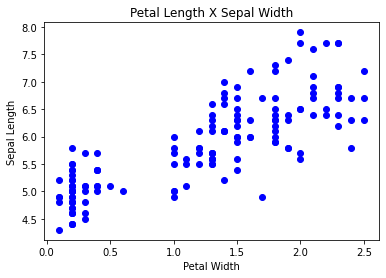

In [ ]:
%matplotlib inline

petal_width = df[ ["petal width (cm)"] ].to_numpy()
sepal_length = df[ ["sepal length (cm)"] ].to_numpy()

plt.title('Petal Length X Sepal Width')  
plt.xlabel('Petal Width')  
plt.ylabel('Sepal Length') 
plt.scatter(petal_width, sepal_length, color="blue")
plt.show()

Por ter maior correlação, decidi utilizar:
- Features: Petal Length
- Target: Sepal Length

## Treinamento

Isolando Features (X) e Target (y)

In [ ]:
X = df[ ["petal length (cm)"] ]
y = df[ ["sepal length (cm)"] ]

Dividindo entre Treinamento e Teste

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("{} para treino\n{} para teste".format(len(X_train), len(X_test)))

120 para treino
30 para teste


Criando modelo e dando fit nos dados de treinamento

In [ ]:
model = LinearRegression()
model.fit(X_train.to_numpy(), y_train.to_numpy())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Resultado do fit:

In [ ]:
coef = model.coef_[0][0]
intercept = model.intercept_[0]
print("Inclinação: {}\nIntercept: {}".format(coef, intercept))

Inclinação: 0.4053221728009456
Intercept: 4.298666036028475


## Avaliação

### Avaliação no Treino

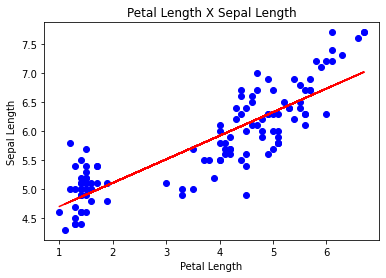

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Petal Length X Sepal Length')  
plt.xlabel('Petal Length')  
plt.ylabel('Sepal Length') 
plt.scatter(X_train, y_train, color="blue")

plt.plot(X_train, model.predict(X_train), color="red")
plt.show()

In [ ]:
prediction = model.predict(X_train.to_numpy())

r2_score(y_train, prediction)

0.7433457054705969

### Avaliação no Teste

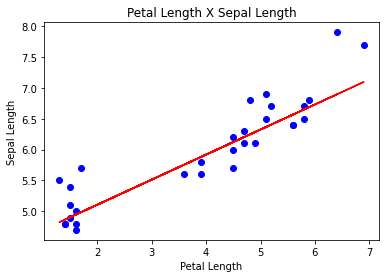

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Petal Length X Sepal Length')  
plt.xlabel('Petal Length')  
plt.ylabel('Sepal Length') 
plt.scatter(X_test, y_test, color="blue")

plt.plot(X_test, model.predict(X_test), color="red")
plt.show()

In [ ]:
prediction = model.predict(X_test.to_numpy())

r2_score(y_test, prediction)

0.812980761507489